# Image Processing SoSe 22 - Assignment - 02

### Deadline is 05.05.2022 at 11:55am

Please solve the assignments together with a partner.
I will run every notebook. Make sure the code runs through. Select `Kernel` -> `Restart & Run All` to test it.

# Exercise 1 - 4 Points
Implement the `rgb_to_hsv` and `hsv_to_rgb` functions. Don't use any color conversion functions from a library.

In [1]:
import math

def rgb_to_hsv(image):
    """
    Converts the numpy array `x` from RGB to the HSV.
    """
    return np.array([[rgb_to_hsv_pixel_1(y) for y in x] for x in image])

#there are two ways to calculate this.

def rgb_to_hsv_pixel_1(entry):
    r = entry[0]
    g = entry[1]
    b = entry[2]
    c_max_index =  np.argmax([r,g,b])
    c_min_index = np.argmin([r,g,b])
    delta = max(r,g,b) - min(r,g,b)
    hue = -1
    if delta==0:
        hue = 0
    elif c_max_index==0:
        hue = 60 * (((g-b)/delta)+0) 
    elif c_max_index==1:
        hue = 60 * (((b-r)/delta)+2)
    else :
        hue = 60 * (((r-g)/delta)+4)
    if hue < 0 : 
        hue += 360
    if max(r,g,b)==0:
        saturation = 0
    else :
        saturation = delta/max(r,g,b)
    value = max(r,g,b)
    return [hue,saturation,value]


In [2]:
def hsv_to_rgb_pixel(entry):
    """
    Converts the numpy array `x` from HSV to the RGB.
    We took the idea for our algorithm from here :  https://en.wikipedia.org/wiki/HSL_and_HSV#HSV_to_RGB
    """
    h = entry[0]
    s = entry[1]
    v = entry[2]
    # chroma 
    c = v * s
    h1 = h/60
    rgb = [0,0,0]
    if h1 < 0 or h1 > 6: 
        print("not valid value")
    x = c * (1 - abs(h1 % 2 - 1))
    if h1<1 and h1>=0:
        rgb = [c,x,0]
    elif  h1<2 and h1>=1:
        rgb = [x,c,0]
    elif h1<3 and h1>=2:
        rgb = [0,c,x]
    elif h1<4 and h1>=3:
        rgb = [0,x,c]
    elif h1<5 and h1>=4:
        rgb = [x,0,c]
    else :
        rgb = [c,0,x]
    m = v-c
    r = rgb[0]
    g = rgb[1]
    b = rgb[2]
    rgb = [r + m, g+m, b+m]
    return rgb

def hsv_to_rgb(image):
    """
    Converts the numpy array `x` from HSB to the RGB.
    """
    return np.array([[hsv_to_rgb_pixel(y) for y in x] for x in image])



#Plot the saturation of the astronaut image (see last assignment)

Text(0.5, 1.0, 'Saturation')

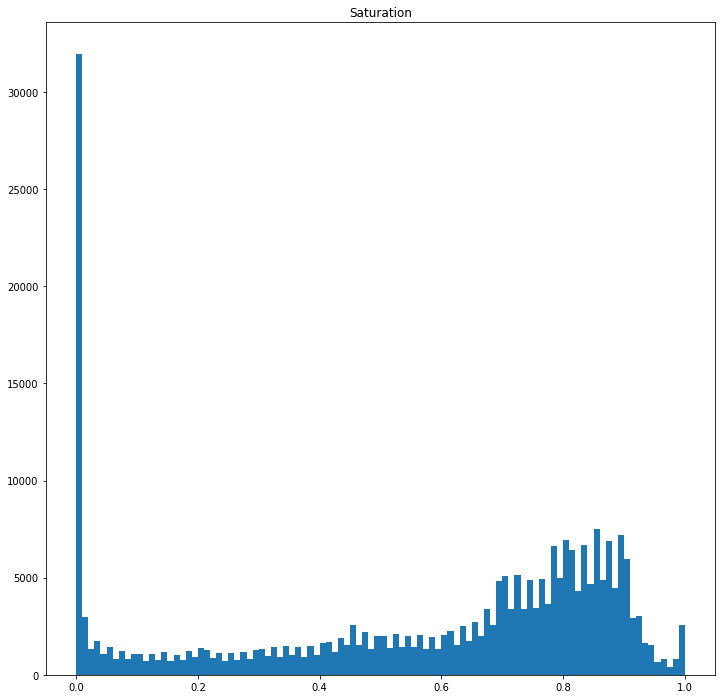

In [3]:
# display the plots inside the notebook
%matplotlib inline
from skimage import io, data, color

import numpy as np
import matplotlib.pyplot as plt
from skimage.data import astronaut
import pylab
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

img = astronaut() / 255.
img_as_hsv = rgb_to_hsv(img)
# your code, saturation is always the first value
sat = img_as_hsv[:,:,-1].flatten()
plt.hist(sat,bins=100)
plt.title("Saturation")

In [4]:
def mult_2(y):
    if y*2>1:
        return 1
    else :
        return y*2

Increase the saturation by a factor of 2, convert it back to RGB and plot the result.

In [5]:
img_as_hsv_sat_inc =  np.array([[[y[0],mult_2(y[1]),y[2]] for y in x] for x in img_as_hsv])

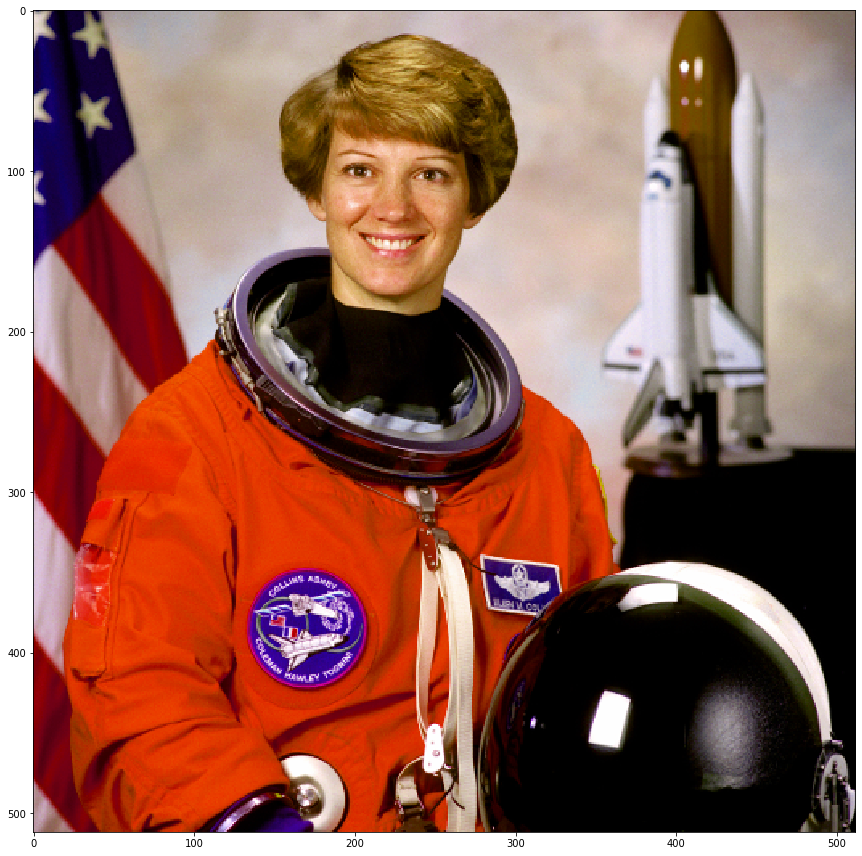

In [6]:
img_rgb_back_converted = hsv_to_rgb(img_as_hsv_sat_inc)
io.imshow(img_rgb_back_converted)

# Exercise 2 - 6 Points

Implement affine transformation with [linear interpolation].
Implement the functions `affine_transformation` and `bilinear_interpolation`. Apply some affine transformation of your choice and smooth the output using your bilinear interpolation.

The [skimage](http://scikit-image.org/) library comes with multiple useful test images.  Let's start with an image of an astronaut. 

In [7]:
from skimage.data import astronaut
from skimage.color import rgb2gray

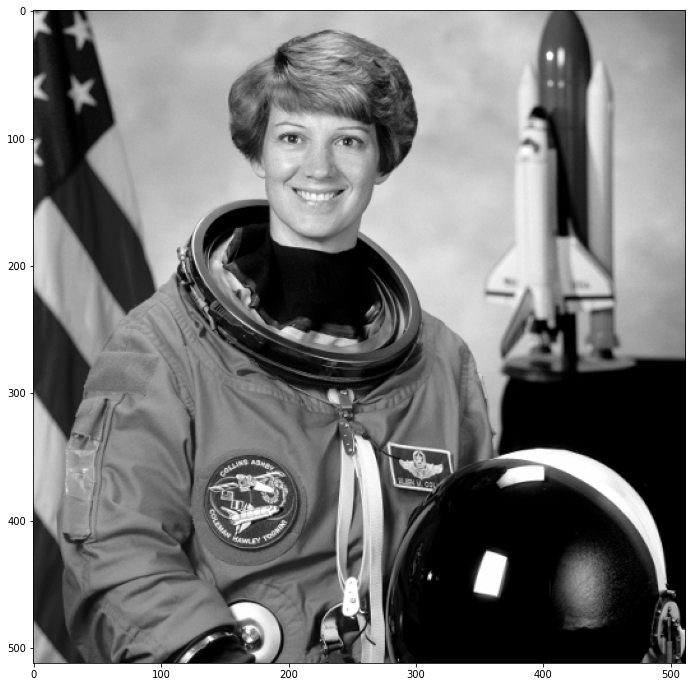

In [8]:
# We use a gray image. All the algorithms should work with color images too.
img = rgb2gray(astronaut() / 255.)
plt.imshow(img, cmap='gray')
plt.show()

In [9]:
def derive_y(image):
    """Computes the derivative of the image w.r.t the y coordinate"""
    derived_image = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if y + 1 < image.shape[1] and y - 1 > 0:
                derived_image[x,y] = (image[x, y + 1] - image[x, y - 1]) / 2.0
    return derived_image

def derive_x(image):
    """Computes the derivative of the image w.r.t the x coordinate"""
    derived_image = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            if x + 1 < image.shape[1] and x - 1 > 0:
                derived_image[x,y] = (image[x + 1, y] - image[x - 1, y]) / 2.0
    return derived_image

In [10]:
dx_img = derive_x(img)
dy_img = derive_y(img)

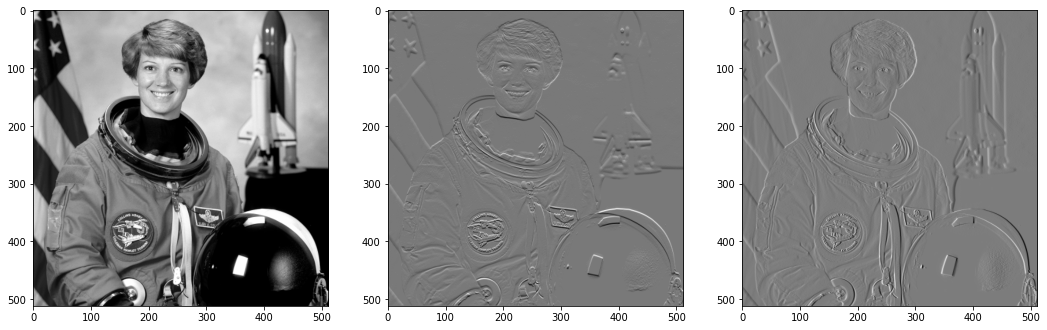

In [11]:
plt.figure(figsize=(18, 12))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.subplot(132)
plt.imshow(dx_img, cmap='gray')
plt.subplot(133)
plt.imshow(dy_img, cmap='gray')
plt.show()

Here are some sample affine transformations to be used later on

In [12]:
T_scale = np.array([
    [0.75, 0, 0],
    [0, 0.75, 0],
    [0, 0, 1],
])

In [13]:
T_shear = np.array([
    [1, 0.3, 0],
    [0, 1, 0],
    [0, 0, 1],
])

In [14]:
# you can use this function to invert the matricies
np.linalg.inv(T_scale)

array([[1.33333333, 0.        , 0.        ],
       [0.        , 1.33333333, 0.        ],
       [0.        , 0.        , 1.        ]])

In [29]:
def affine_transformation(img, matrix):
    output = np.zeros(img.shape)
    #do it here, to make the loop run faster
    inverted_matrix = np.linalg.inv(matrix)
    for x in range(output.shape[0]):
        for y in range(output.shape[1]):
            helper = np.zeros(3)
            helper = inverted_matrix.dot([x,y,1])
            output[x,y] = bilinear_interpolation(img,helper)
    return output

In [39]:
import bisect

def bilinear_interpolation(img, indicies):
    x = np.asarray(indicies[0])
    y = np.asarray(indicies[1])
    
    x_0 = np.floor(x).astype(int)
    y_0 = np.floor(y).astype(int)
   
    x_1 = x_0 + 1
    y_1 = y_0 + 1
    
    #make sure the intervals do not exceed the image boundaries
    x_0 = np.clip(x_0, 0, img.shape[1]-1)
    x_1 = np.clip(x_1, 0, img.shape[1]-1)
    y_0 = np.clip(y_0, 0, img.shape[0]-1)
    y_1 = np.clip(y_1, 0, img.shape[0]-1)
    
    #take the four points as described in the lecture 
    Q11 = img[x_1,y_0]
    Q12 = img[x_0,y_0]
    Q21 = img[x_1,y_1]
    Q22 = img[x_0,y_1]
    
    #calculate helper values 
    w_1 = (x_1 - x)/(x_1 - x_0)
    w_2 = (x-x_0)/(x_1-x_0)
    w_3 = (y_1 - y)/(y_1-y_0)
    w_4 = (y - y_0)/(y_1-y_0)
    
    #calculate the value of the new pixels in both directions
    f_R1 = (w_1*Q11 + w_2*Q21)
    f_R2 = (w_1 *Q12 + w_2*Q22)
    f_P = w_3*f_R1 + w_4*f_R2
    return f_P

/tmp/ipykernel_16/173973473.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  w_1 = (x_1 - x)/(x_1 - x_0)
/tmp/ipykernel_16/173973473.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  w_2 = (x-x_0)/(x_1-x_0)
/tmp/ipykernel_16/173973473.py:32: RuntimeWarning: invalid value encountered in double_scalars
  f_R1 = (w_1*Q11 + w_2*Q21)
/tmp/ipykernel_16/173973473.py:33: RuntimeWarning: invalid value encountered in double_scalars
  f_R2 = (w_1 *Q12 + w_2*Q22)
/tmp/ipykernel_16/173973473.py:28: RuntimeWarning: invalid value encountered in double_scalars
  w_3 = (y_1 - y)/(y_1-y_0)
/tmp/ipykernel_16/173973473.py:29: RuntimeWarning: invalid value encountered in double_scalars
  w_4 = (y - y_0)/(y_1-y_0)
/tmp/ipykernel_16/173973473.py:26: RuntimeWarning: invalid value encountered in double_scalars
  w_1 = (x_1 - x)/(x_1 - x_0)
/tmp/ipykernel_16/173973473.py:27: RuntimeWarning: invalid value encountered in double_scalars
  w_2 = (x-x_0)/(x_1-x_0)


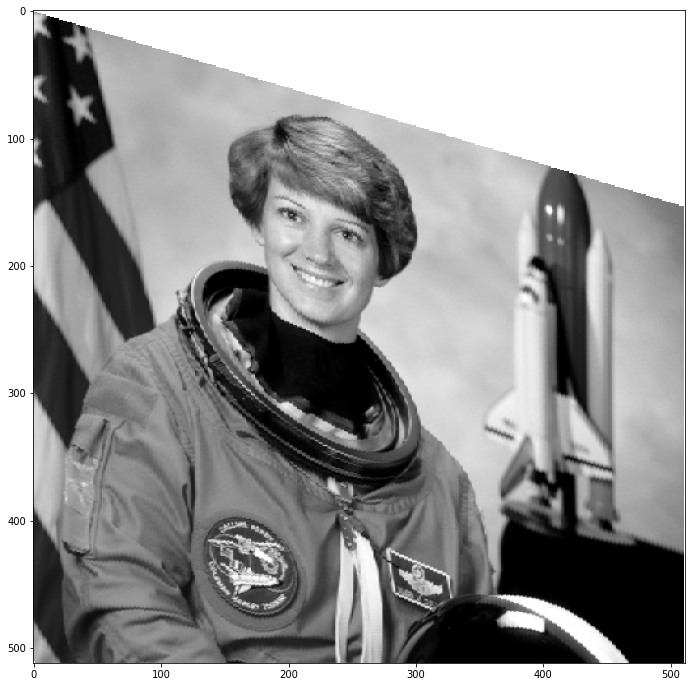

In [40]:
#input [[x1,x2],[y1,y2]]
img_scale = affine_transformation(img, T_shear)
plt.imshow(img_scale, cmap='gray')
plt.show()

/tmp/ipykernel_16/173973473.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  w_3 = (y_1 - y)/(y_1-y_0)
/tmp/ipykernel_16/173973473.py:29: RuntimeWarning: divide by zero encountered in double_scalars
  w_4 = (y - y_0)/(y_1-y_0)
/tmp/ipykernel_16/173973473.py:34: RuntimeWarning: invalid value encountered in double_scalars
  f_P = w_3*f_R1 + w_4*f_R2
/tmp/ipykernel_16/173973473.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  w_1 = (x_1 - x)/(x_1 - x_0)
/tmp/ipykernel_16/173973473.py:27: RuntimeWarning: divide by zero encountered in double_scalars
  w_2 = (x-x_0)/(x_1-x_0)
/tmp/ipykernel_16/173973473.py:32: RuntimeWarning: invalid value encountered in double_scalars
  f_R1 = (w_1*Q11 + w_2*Q21)
/tmp/ipykernel_16/173973473.py:33: RuntimeWarning: invalid value encountered in double_scalars
  f_R2 = (w_1 *Q12 + w_2*Q22)


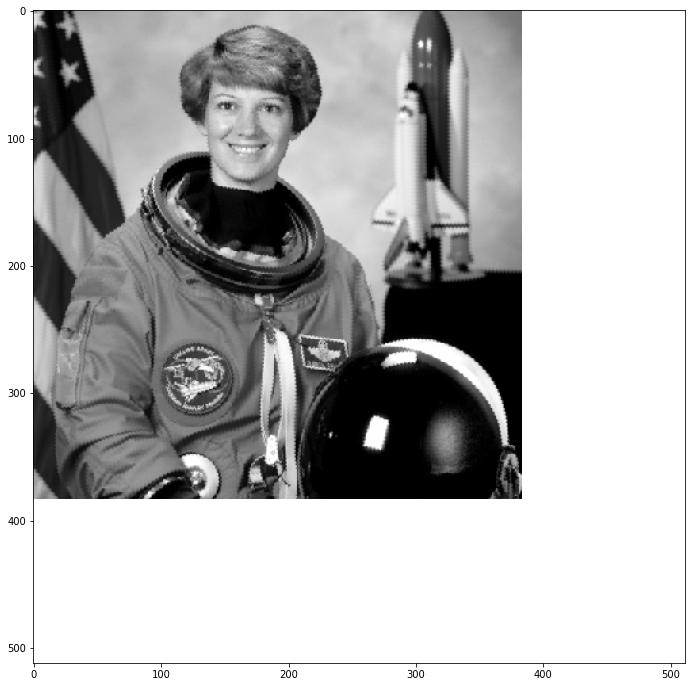

In [41]:
img_scale = affine_transformation(img, T_scale)
plt.imshow(img_scale, cmap='gray')
plt.show()
